Evaluating FA model for 300 trials
Evaluating FA model for 600 trials
Evaluating FA model for 1050 trials
Evaluating FA model for 1500 trials
Evaluating FA model for 3000 trials


Text(0.5, 1.0, '150 neurons, 15 latents')

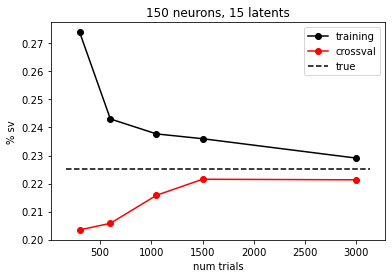

In [2]:
import numpy as np
import pandas as pd
import sim_fa as sf
import factor_analysis as fa
import matplotlib.pyplot as plt
from timeit import default_timer as timer

early_stop = True
n_trials = [300,600,1050,1500,3000]
n_neurons = 150
n_latents = 15
rand_seed = 0

# simulate from a factor analysis model
fa_simulator = sf.sim_fa(n_neurons,n_latents,model_type='fa',rand_seed=rand_seed)
sim_params = fa_simulator.get_params()
sim_model = fa.factor_analysis(model_type='fa')
sim_model.set_params(sim_params)
true_psv = sim_model.compute_metrics()['psv']

train_psv,cv_psv = np.empty(len(n_trials)),np.empty(len(n_trials))
for i,N in enumerate(n_trials):
    print(f"Evaluating FA model for {N} trials")
    X = fa_simulator.sim_data(N,rand_seed=rand_seed)
    model = fa.factor_analysis()
    model.train(X,n_latents,rand_seed=rand_seed)
    train_psv[i] = model.compute_metrics()['psv']
    cv_psv[i] = model.compute_cv_psv(X,n_latents,n_boots=50,\
        rand_seed=rand_seed,return_each=False,test_size=0.1,early_stop=True)

fig,ax = plt.subplots(1,1)
ax.plot(n_trials,train_psv,'ko-',label='training')
ax.plot(n_trials,cv_psv,'ro-',label='crossval')
ax.plot(ax.get_xlim(),np.ones(2)*true_psv,'k--',label='true')
ax.set_xlabel('num trials')
ax.set_ylabel('% sv')
ax.legend()
ax.set_title(f"{n_neurons} neurons, {n_latents} latents")